### Imports

In [1]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
dataa = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)

In [6]:
dataa.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33


In [7]:
dataa.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

#### Raw Data Distribution (before replacement) 

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

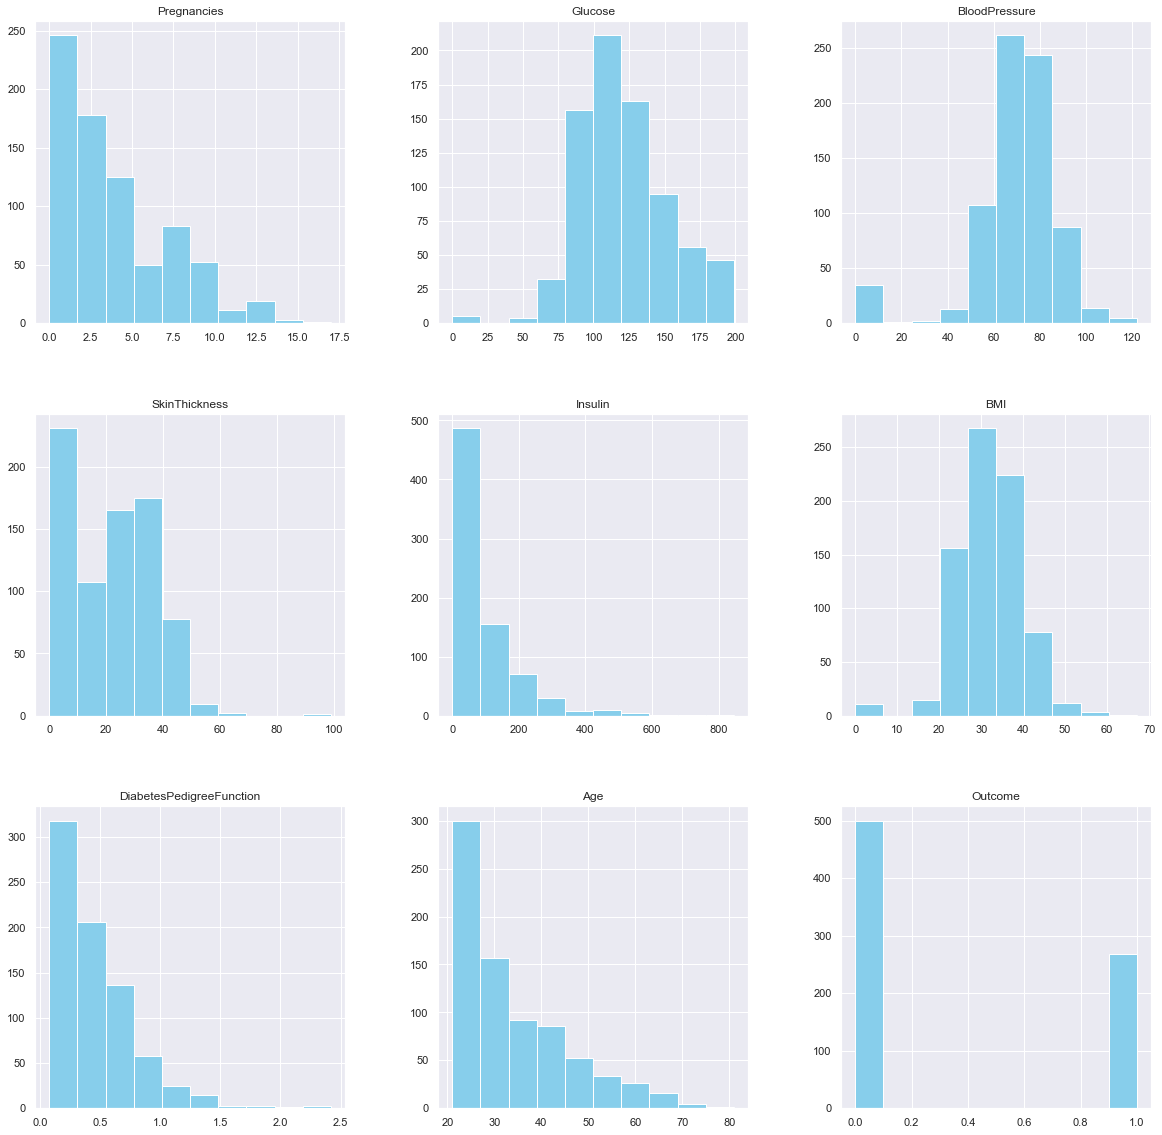

In [8]:
data.hist(figsize = (20, 20), color = 'skyblue')

In [9]:
dataa['Pregnancies'].fillna(dataa['Pregnancies'].mean(), inplace = True) 
dataa['Glucose'].fillna(dataa['Glucose'].mean(), inplace = True) 
dataa['BloodPressure'].fillna(dataa['BloodPressure'].mean(), inplace = True)
dataa['SkinThickness'].fillna(dataa['SkinThickness'].median(), inplace = True)
dataa['Insulin'].fillna(dataa['Insulin'].median(), inplace = True) 
dataa['BMI'].fillna(dataa['BMI'].mean(), inplace = True)

In [10]:
dataa.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.000000,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1.000000,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8.000000,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1.000000,89.0,66.0,23.0,94.0,28.1,0.167,21
4,4.494673,137.0,40.0,35.0,168.0,43.1,2.288,33


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

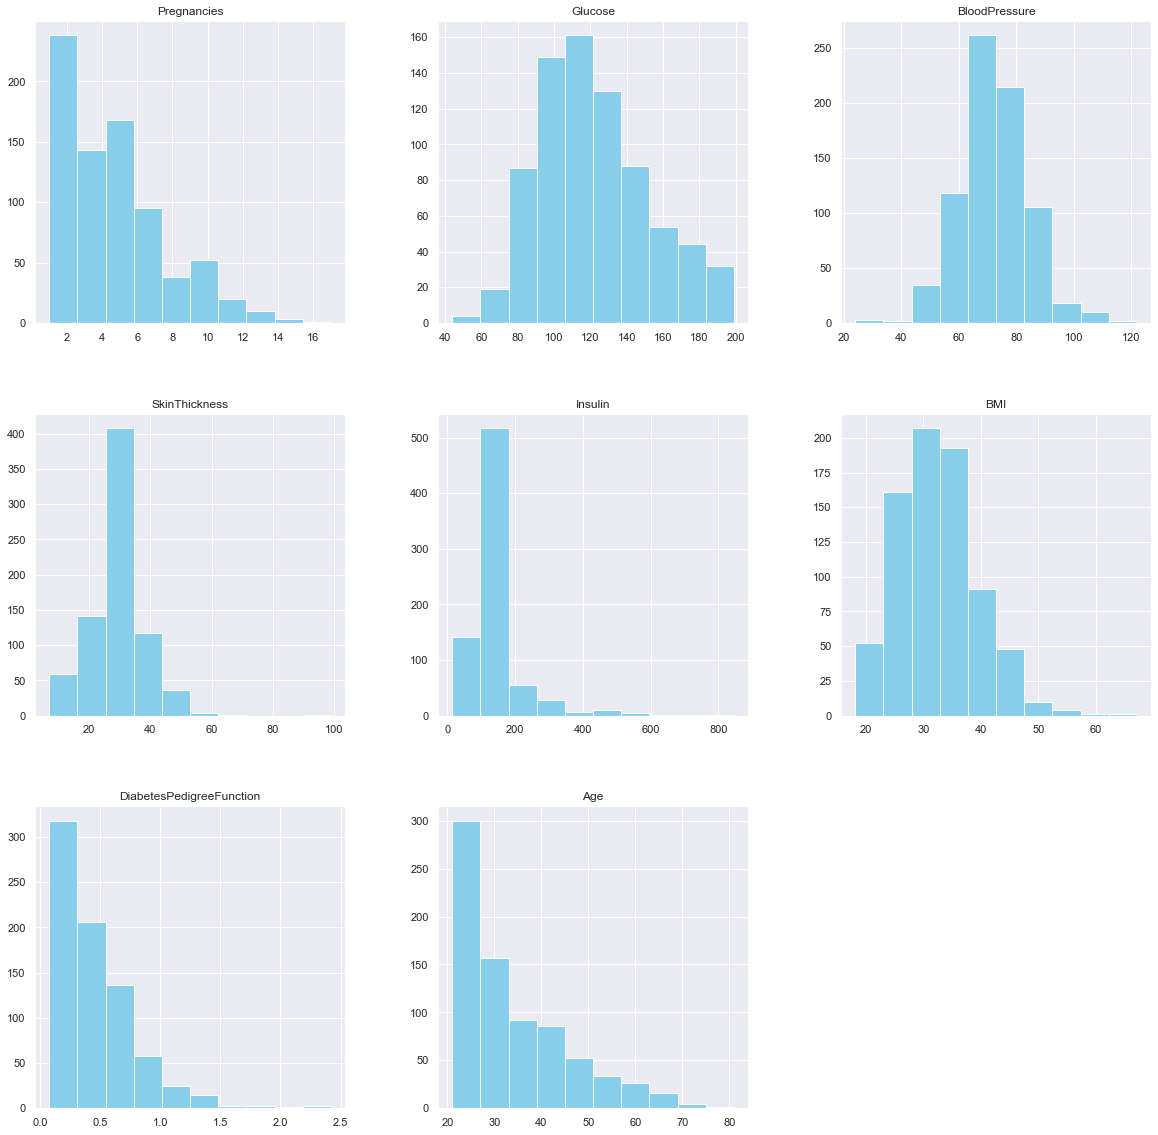

In [11]:
dataa.hist(figsize = (20, 20), color = 'skyblue')

In [12]:
# the data after cleaning the missing value
dataa.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [13]:
# redeclaration the object
cleaned_data = dataa 

In [14]:
cleaned_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.000000,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1.000000,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8.000000,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1.000000,89.0,66.0,23.0,94.0,28.1,0.167,21
4,4.494673,137.0,40.0,35.0,168.0,43.1,2.288,33


In [15]:
cleaned_data.shape

(768, 8)

In [16]:
# move the target column y to the cleaned data
cleaned_data['Outcome'] = data['Outcome']

In [17]:
cleaned_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8.000000,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4.494673,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [18]:
cleaned_data.shape

(768, 9)

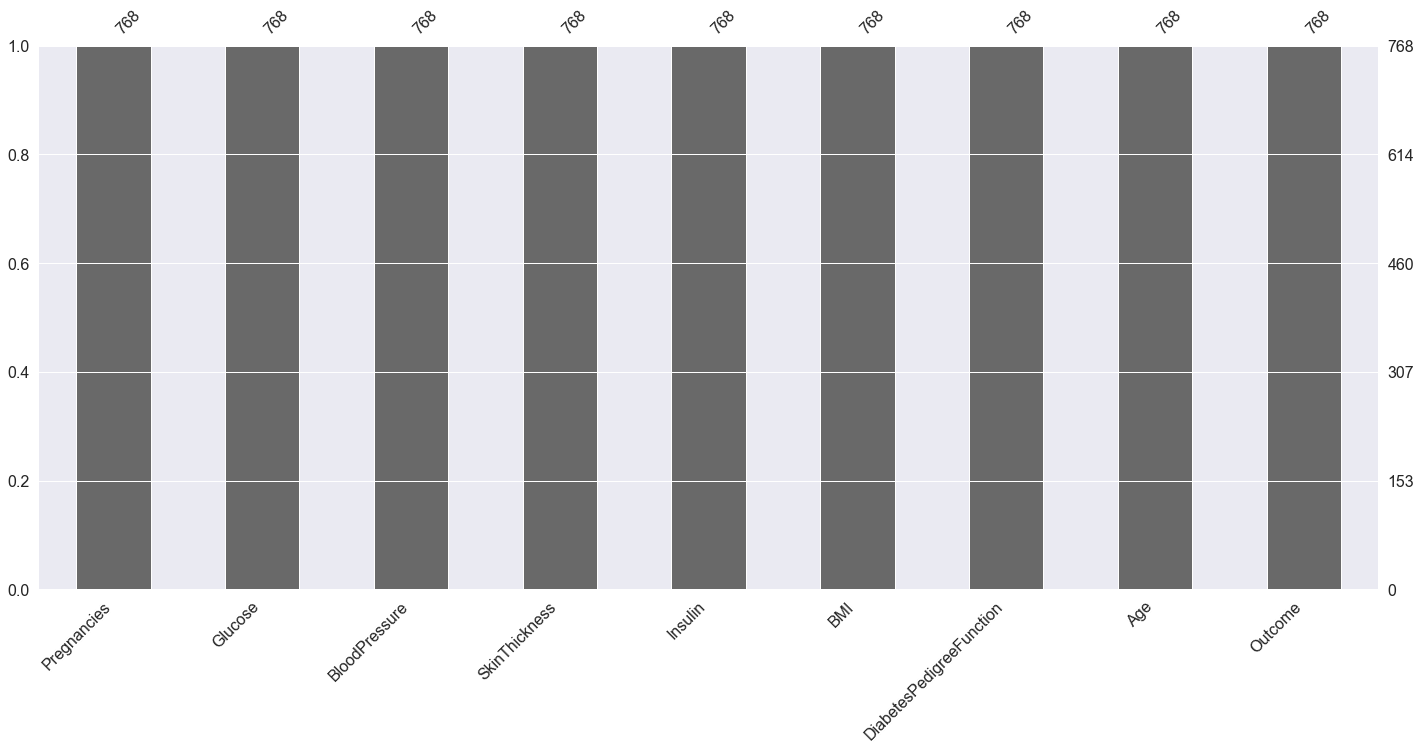

In [19]:
import missingno as msno
p = msno.bar(cleaned_data)

0    500
1    268
Name: Outcome, dtype: int64


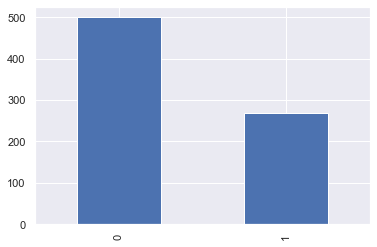

In [20]:
color_wheel = {1: "#9e9b93", 
               2: "#eb152a"}
colors = cleaned_data["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(cleaned_data.Outcome.value_counts())
p = cleaned_data.Outcome.value_counts().plot(kind="bar")

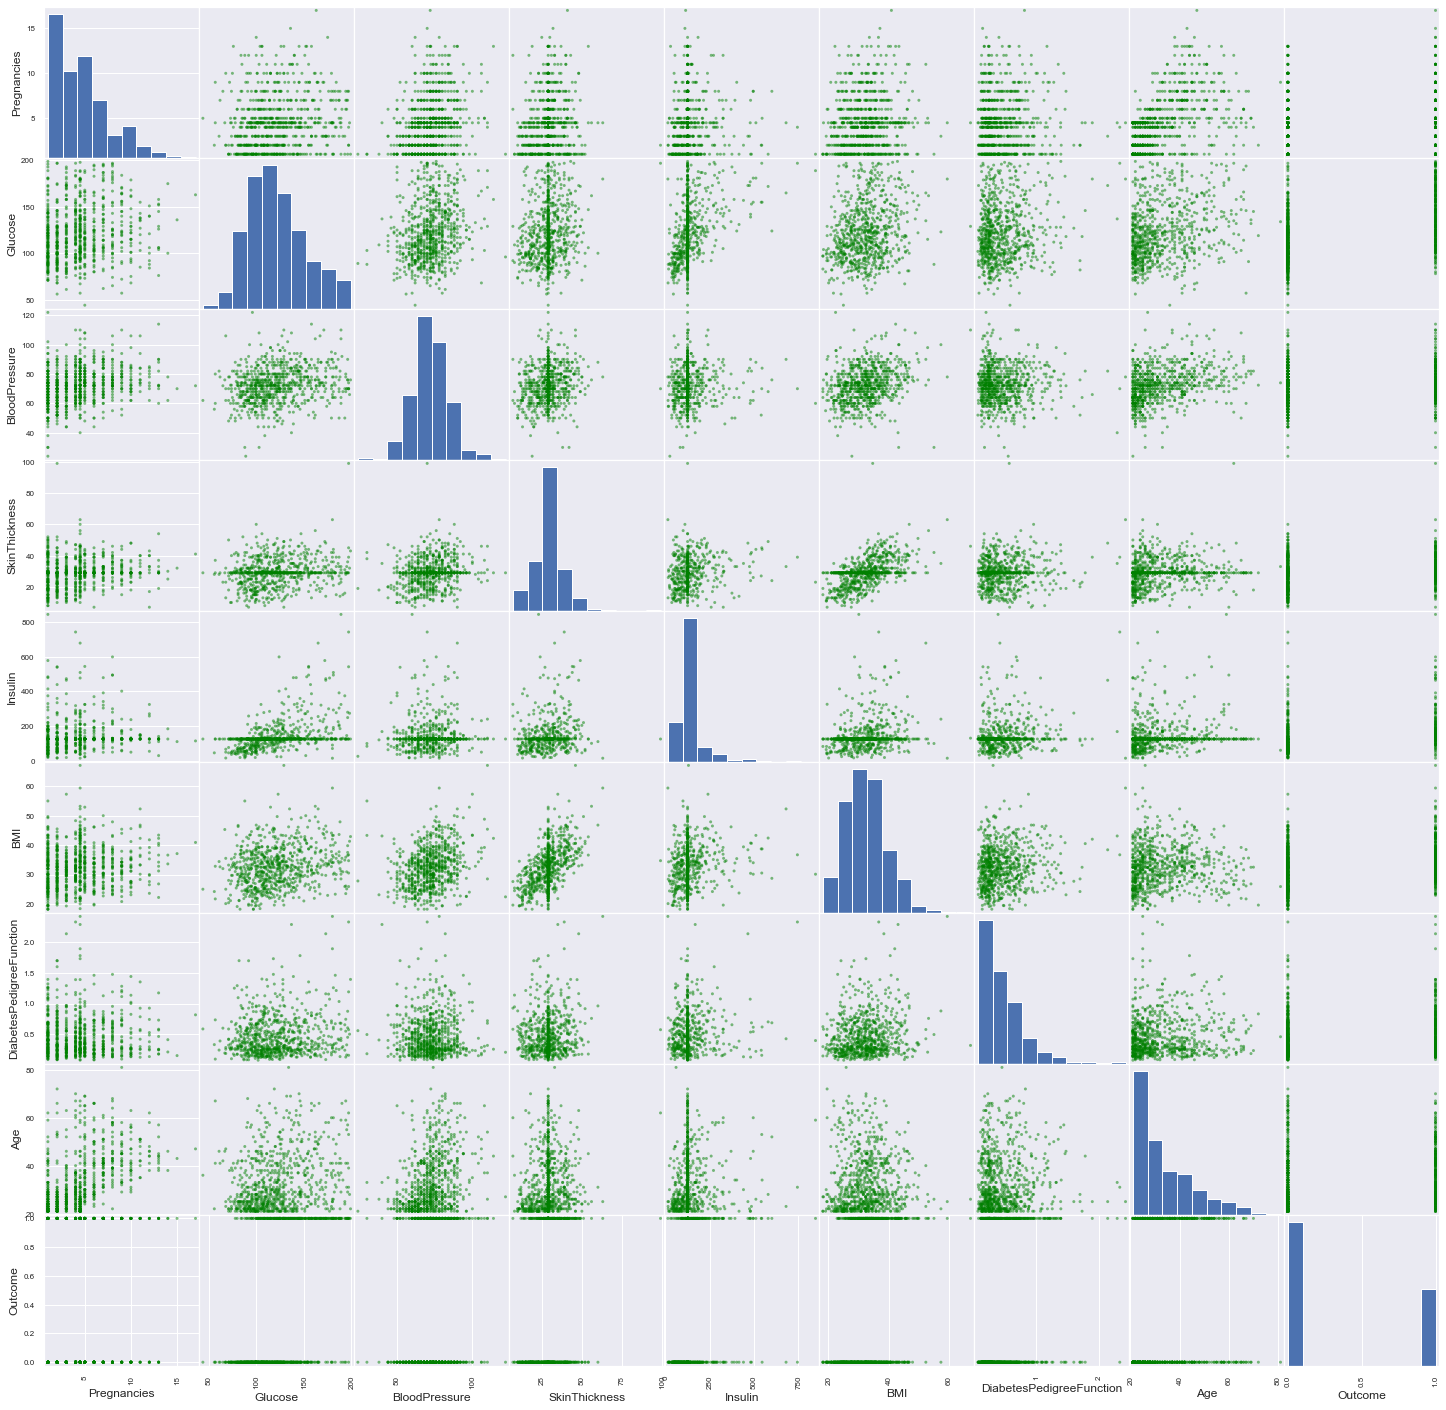

In [21]:
# from pandas.tools.plotting import scatter_matrix # DEPRECATED
from pandas.plotting import scatter_matrix

p=scatter_matrix(cleaned_data,figsize=(25, 25), color = 'green')
# HOW WE DO READING THE SCATTER MATRIX???

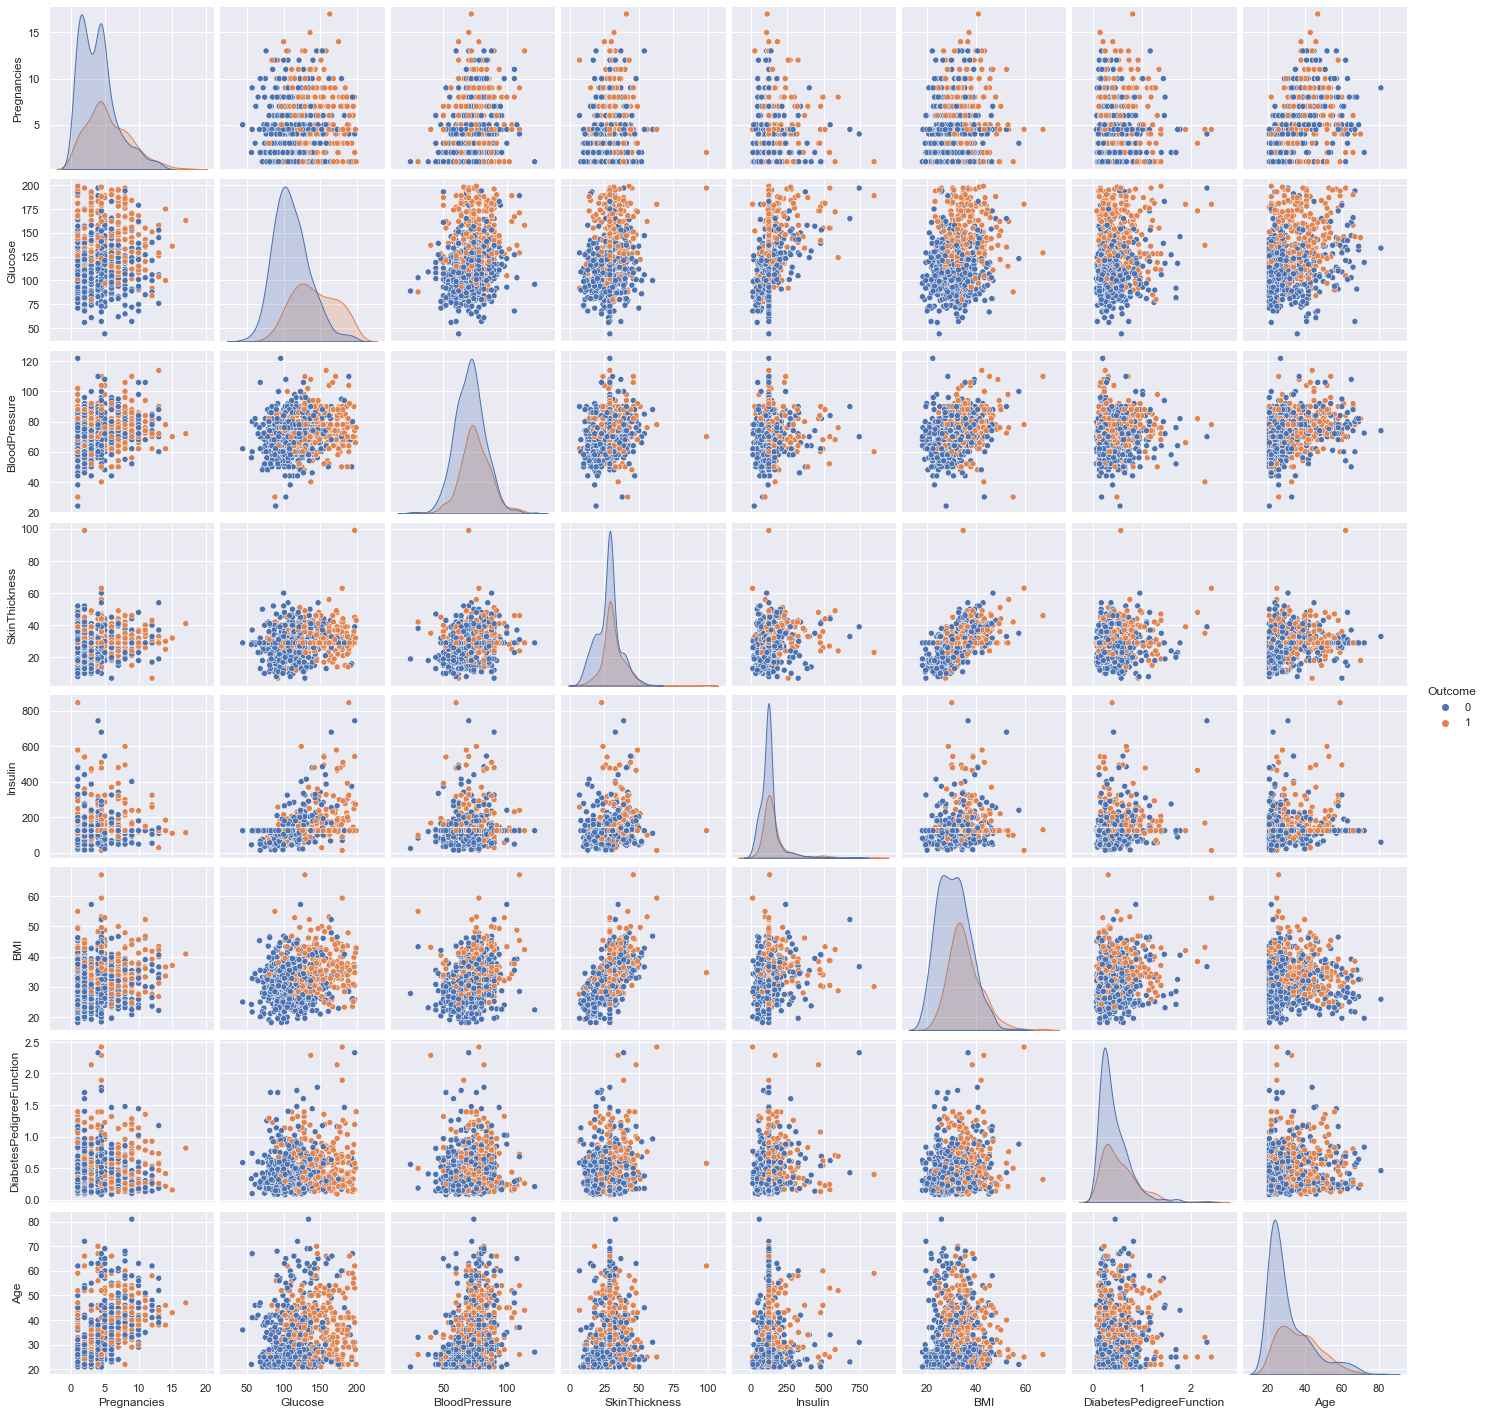

In [22]:
sns.pairplot(cleaned_data, hue = 'Outcome')

<AxesSubplot:>

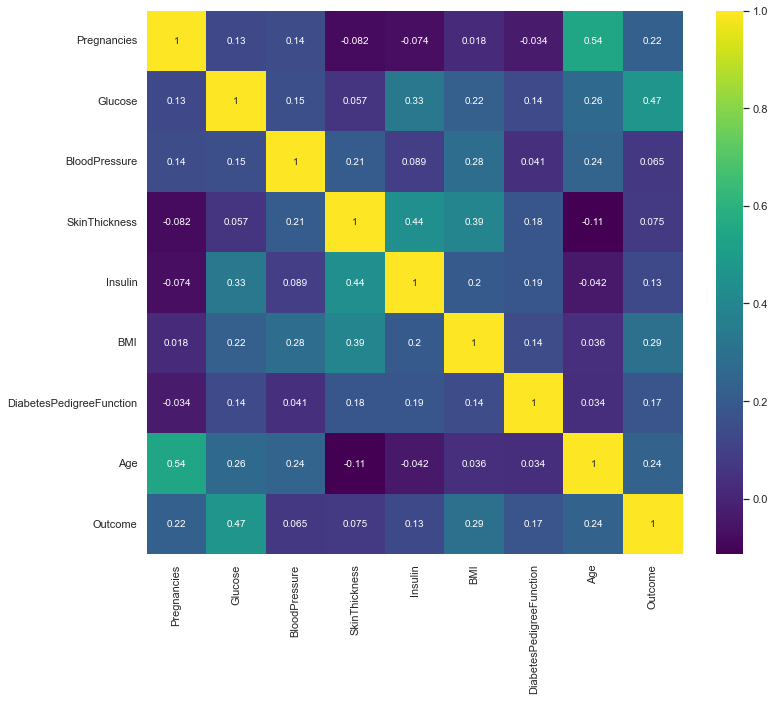

In [24]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

<AxesSubplot:>

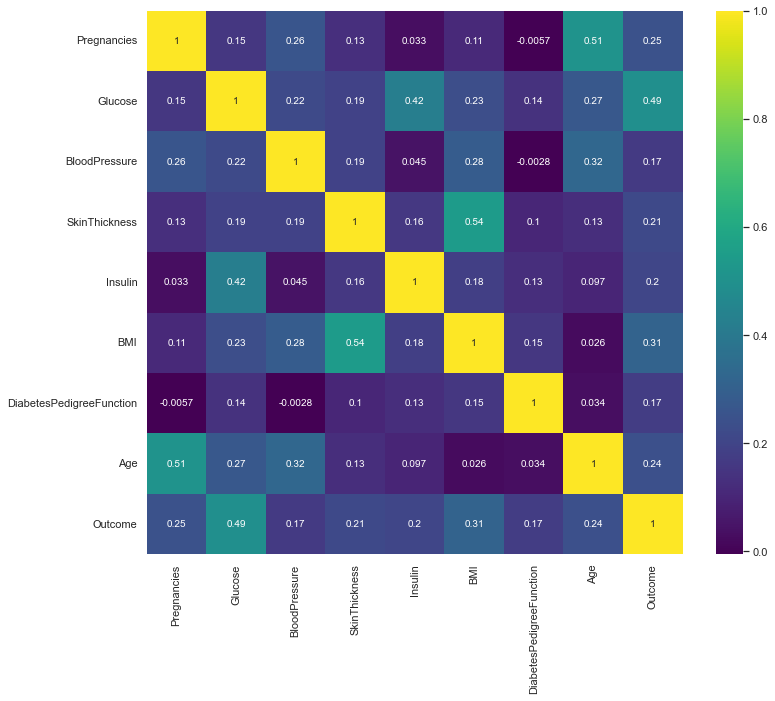

In [25]:
plt.figure(figsize=(12, 10))
sns.heatmap(cleaned_data.corr(), annot=True, cmap='viridis')

In [26]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X =  pd.DataFrame(sc_X.fit_transform(cleaned_data.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
# Code up there is droping the target data which "outcome"

In [27]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,5.062549e-01,0.865108,-0.033518,0.670643,-0.181541,0.166292,0.468492,1.425995
1,-1.175289e+00,-1.206162,-0.529859,-0.012301,-0.181541,-0.852531,-0.365061,-0.190672
2,1.178873e+00,2.015813,-0.695306,-0.012301,-0.181541,-1.332833,0.604397,-0.105584
3,-1.175289e+00,-1.074652,-0.529859,-0.695245,-0.540642,-0.634212,-0.920763,-1.041549
4,2.987023e-16,0.503458,-2.680669,0.670643,0.316566,1.548980,5.484909,-0.020496


In [29]:
y = cleaned_data.Outcome

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42, stratify=y)

In [31]:
print('X_training : ',len(X_train))
print('y_training : ',len(y_train))
# size of the training

X_training :  512
y_training :  512


In [32]:
print('X_testing : ',len(X_test))
print('y_testing : ',len(y_test))
# size of the test

X_testing :  256
y_testing :  256


In [33]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [34]:
# score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)

train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]

print('Max train score {} % and k = {}'.format(max_train_score*100, list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [35]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)

test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]

print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 74.21875 % and k = [11]


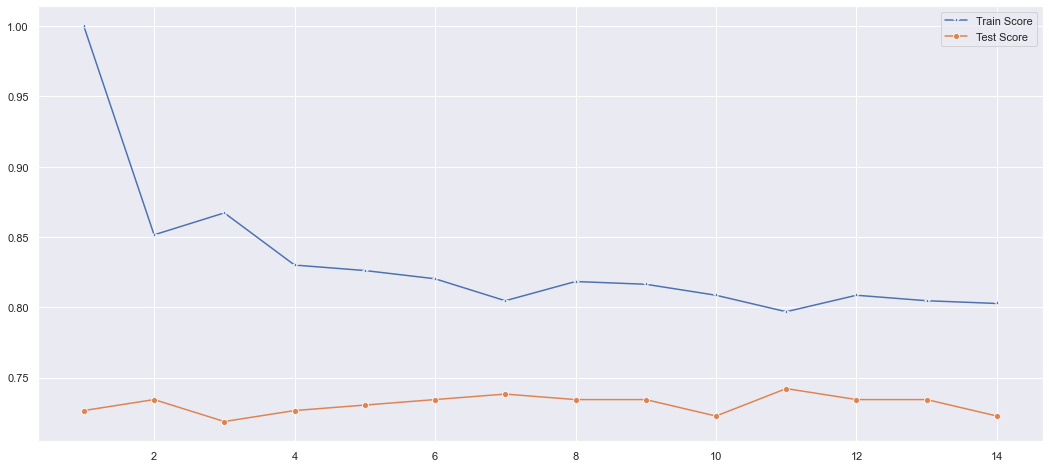

In [36]:
plt.figure(figsize=(18,8))
p = sns.lineplot(range(1,15), train_scores, marker='*', label='Train Score')
p = sns.lineplot(range(1,15), test_scores, marker='o', label='Test Score')

In [37]:
train_scores

[1.0,
 0.8515625,
 0.8671875,
 0.830078125,
 0.826171875,
 0.8203125,
 0.8046875,
 0.818359375,
 0.81640625,
 0.80859375,
 0.796875,
 0.80859375,
 0.8046875,
 0.802734375]

In [38]:
test_scores

[0.7265625,
 0.734375,
 0.71875,
 0.7265625,
 0.73046875,
 0.734375,
 0.73828125,
 0.734375,
 0.734375,
 0.72265625,
 0.7421875,
 0.734375,
 0.734375,
 0.72265625]

In [39]:
average_test = sum(test_scores) / len(test_scores)
average_test

0.7310267857142857

In [40]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7421875

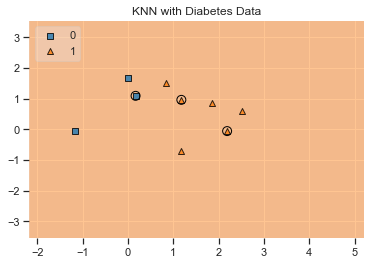

In [41]:
# trying to plot decision boundary
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

# Adding axes annotations
#plt.xlabel('sepal length [cm]')
#plt.ylabel('petal length [cm]')
plt.title('KNN with Diabetes Data')
plt.show()

In [42]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above

y_pred = knn.predict(X_test)

confusion_matrix(y_test,y_pred)

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,140,27,167
1,39,50,89
All,179,77,256


Text(0.5, 12.5, 'Predicted label')

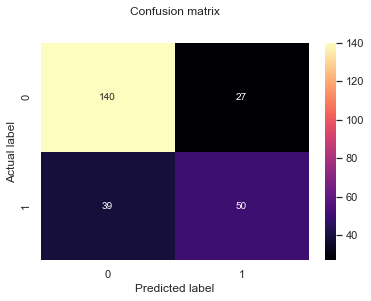

In [43]:
y_pred = knn.predict(X_test) # to predict we must use X_test or maybe our prefer data set

from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred) # make confusion matrix
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="magma" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [47]:
#import classification_report
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       167
           1       0.65      0.56      0.60        89

    accuracy                           0.74       256
   macro avg       0.72      0.70      0.71       256
weighted avg       0.74      0.74      0.74       256



In [44]:
from sklearn.metrics import roc_curve

y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

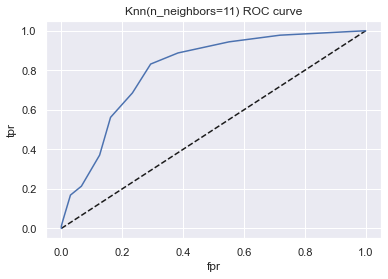

In [45]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [46]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_pred_proba)

0.8041445199488663

In [48]:
# applying the grid search method
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors

param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7799677446736271
Best Parameters: {'n_neighbors': 17}


actually the experiment i have done is replacing the zero value on some variable like pregnencies with mean value, glucose with mean value, bloodpreasure with mean value, skinthickness with median value, insulin with median value, bmi with median value, and we have the result is turn down for the test score from 74% to 73%